<a href="https://colab.research.google.com/github/JoeyThirawat/RAI2.2-ComputerVisions/blob/main/Wk06_CV_24Feb22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

32


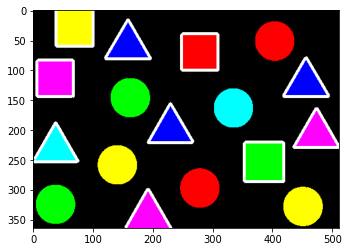

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# hough line
url = '/content/drive/MyDrive/dataset/colorobject.png'
img = cv2.imread(url)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold binary
ret, bw = cv2. threshold(gray, 10,255, cv2. THRESH_BINARY)

# Canny edge detection
canedge = cv2.Canny (bw, 10,200)

# hough line
lines = cv2.HoughLinesP(canedge, 1, np.pi/360, 50, minLineLength = 50, maxLineGap = 10)
print(len(lines))
# print(lines[0])

for i in range(len(lines)):
  for x1,y1,x2,y2 in lines[i]:
    cv2.line(img, (x1, y1), (x2,y2),(255, 255, 255), thickness = 3)
plt.imshow(img)

7
[[277.5 296.5  32.1]
 [141.5 258.5  33. ]
 [163.5 145.5  32.2]
 [451.5 328.5  33.1]
 [404.5  49.5  31.4]
 [ 38.5 324.5  33.3]
 [335.5 164.5  31.5]]
[[278 296  32]
 [142 258  33]
 [164 146  32]
 [452 328  33]
 [404  50  31]
 [ 38 324  33]
 [336 164  32]]


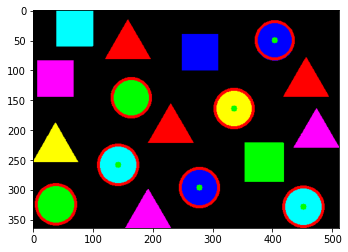

In [5]:
# Hough circle
rgb2 = rgb.copy()
circles = cv2. HoughCircles (gray,
                             cv2.HOUGH_GRADIENT,
                             dp=1.0, minDist=20,
                             param1 = 20,
                             param2 = 10,
                             minRadius = 30,
                             maxRadius = 40)
print(len(circles[0]))
print(circles[0])
circles = np.uint16(np.around(circles))
print(circles[0])

for i in circles[0]:
  cv2.circle(rgb2,(i[0],i[1]), i[2], (255,0,0), thickness = 3)
  cv2.circle(rgb2, (i[0],i[1]), 5, (0,255,0), thickness = -1)
plt.imshow(rgb2)

10


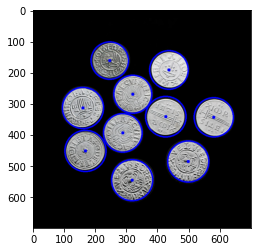

In [6]:
# Quiz 1
# 63011357
url = '/content/drive/MyDrive/dataset/coins.jpg'
img = cv2.imread(url)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
rgb2 = rgb.copy()

# Circle function
circles = cv2.HoughCircles (gray, cv2.HOUGH_GRADIENT,
                            dp = 1.0,
                            minDist = 120,
                            param1 = 35,
                            param2 = 10,
                            minRadius = 60,
                            maxRadius = 70)

print(len(circles[0]))
# print(circles[0])

circles = np.uint16(np.around(circles))
# print(circles[0])

for i in circles[0]:
  cv2.circle(rgb2,(i[0],i[1]), i[2], (0,0,255), thickness = 3)
  cv2.circle(rgb2, (i[0],i[1]), 5, (0,0,255), thickness = -1)
plt.imshow(rgb2)